# Regression Models for predicting Energy
# ↳ using Noise Injection data augmentation using different values for n

## Libraries

In [1]:
# for building the models
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# for computing the scores --> https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/
import math
from sklearn.metrics import mean_squared_error, r2_score

# for result visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# for loading data
import pickle 

## Data loading

In [2]:
# Load train test
f_train_test = open('train_test.pickle', 'rb')
(train,test) = pickle.load(f_train_test)
f_train_test.close()

In [3]:
# Load train samples dfs
f_train_samples = open('train_samples.pickle', 'rb')
(train10, train20, train30, train40, train50, train60, train70, train80, train90) = pickle.load(f_train_samples)
f_train_samples.close()

In [4]:
# Load train augmented samples dfs
f_train_energy_samples_aug_n = open('train_energy_samples_aug_n.pickle', 'rb')
(train20_aug_n1,train20_aug_n2,train20_aug_n3,train20_aug_n4,train20_aug_n5,train50_aug_n1,train50_aug_n2,train50_aug_n3,train50_aug_n4,train50_aug_n5,train80_aug_n1,train80_aug_n2,train80_aug_n3,train80_aug_n4,train80_aug_n5) = pickle.load(f_train_energy_samples_aug_n)
f_train_energy_samples_aug_n.close()

## Prepare data for modeling

In [5]:
train_20 = [train20,train20_aug_n1,train20_aug_n2,train20_aug_n3,train20_aug_n4,train20_aug_n5]
train_50 = [train50,train50_aug_n1,train50_aug_n2,train50_aug_n3,train50_aug_n4,train50_aug_n5]
train_80 = [train80,train80_aug_n1,train80_aug_n2,train80_aug_n3,train80_aug_n4,train80_aug_n5]

In [6]:
# train data 20%
X_train_20_list = []
y_train_20_list = []
for i in range(len(train_20)):
    X_train_20_list.append(train_20[i][['lyrics']].values.flatten())
    y_train_20_list.append(train_20[i][['energy']].values)

# train data 50%
X_train_50_list = []
y_train_50_list = []
for i in range(len(train_50)):
    X_train_50_list.append(train_50[i][['lyrics']].values.flatten())
    y_train_50_list.append(train_50[i][['energy']].values)

# train data 80%
X_train_80_list = []
y_train_80_list = []
for i in range(len(train_80)):
    X_train_80_list.append(train_80[i][['lyrics']].values.flatten())
    y_train_80_list.append(train_80[i][['energy']].values)

    
# test data
X_test = test[['lyrics']].values.flatten()
y_test = test[['energy']].values

In [7]:
# range of the lambdas
x_range = [0, 1, 5, 10, 15, 20]

## SGD Regressor

In [8]:
def SGDR_Regressor(X_list,y_list,X_test,y_test):
    SGDR_MSE = []

    for i in tqdm(range(len(train_20))):
        #training de model
        pipe_SGDR = Pipeline([('tfidf_vec' , TfidfVectorizer(min_df=3,
                                                    max_features=5000,
                                                    stop_words='english')),
                     ('clf_SGDR'   , SGDRegressor(random_state=79068588)),
                    ])
        pipe_SGDR.fit(X_list[i],y_list[i].ravel())
        
        #scores
        y_pred=pipe_SGDR.predict(X_test)
        SGDR_MSE.append(mean_squared_error(y_test,y_pred))
        
    return(SGDR_MSE)

In [9]:
sgdr_scores_20 = SGDR_Regressor(X_train_20_list,y_train_20_list,X_test,y_test)
sgdr_scores_50 = SGDR_Regressor(X_train_50_list,y_train_50_list,X_test,y_test)
sgdr_scores_80 = SGDR_Regressor(X_train_80_list,y_train_80_list,X_test,y_test)

100%|██████████| 6/6 [00:13<00:00,  2.27s/it]


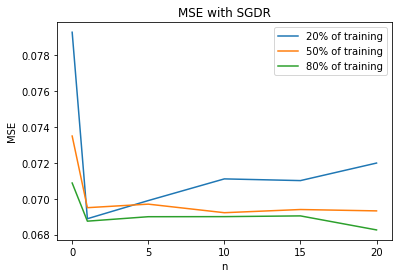

In [10]:
plt.plot(x_range, sgdr_scores_20, label='20% of training')
plt.plot(x_range, sgdr_scores_50, label='50% of training')
plt.plot(x_range, sgdr_scores_80, label='80% of training')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('MSE with SGDR')
plt.legend()
plt.show()

## Decision Tree Regressor

In [11]:
def DT_Regressor(X_list,y_list,X_test,y_test):
    DTR_MSE = []

    for i in tqdm(range(len(train_20))):
        #training de model
        pipe_DTR = Pipeline([('tfidf_vec' , TfidfVectorizer(min_df=3,
                                                    max_features=5000,
                                                    stop_words='english')),
                     ('clf_DTR'   , DecisionTreeRegressor(random_state=79068588)),
                    ])
        pipe_DTR.fit(X_list[i],y_list[i].ravel())
        
        #scores
        y_pred=pipe_DTR.predict(X_test)
        DTR_MSE.append(mean_squared_error(y_test,y_pred))
        
    return(DTR_MSE)

In [12]:
dt_scores_20 = DT_Regressor(X_train_20_list,y_train_20_list,X_test,y_test)
dt_scores_50 = DT_Regressor(X_train_50_list,y_train_50_list,X_test,y_test)
dt_scores_80 = DT_Regressor(X_train_80_list,y_train_80_list,X_test,y_test)

100%|██████████| 6/6 [02:10<00:00, 21.79s/it]


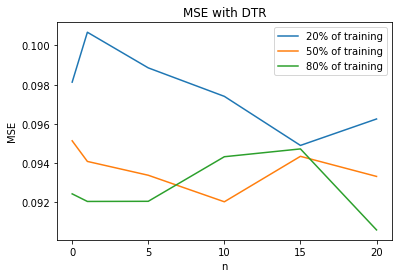

In [13]:
plt.plot(x_range, dt_scores_20, label='20% of training')
plt.plot(x_range, dt_scores_50, label='50% of training')
plt.plot(x_range, dt_scores_80, label='80% of training')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('MSE with DTR')
plt.legend()
plt.show()

## Linear SV Regressor

In [14]:
def SVR_Regressor(X_list,y_list,X_test,y_test):
    SVR_MSE = []

    for i in tqdm(range(len(train_20))):
        #training de model
        pipe_SVR = Pipeline([('tfidf_vec' , TfidfVectorizer(min_df=3,
                                                    max_features=5000,
                                                    stop_words='english')),
                     ('clf_SVR'   , LinearSVR(max_iter=10000,random_state=79068588)),
                    ])
        pipe_SVR.fit(X_list[i],y_list[i].ravel())
        
        #scores
        y_pred=pipe_SVR.predict(X_test)
        SVR_MSE.append(mean_squared_error(y_test,y_pred))
        
    return(SVR_MSE)

In [15]:
svr_scores_20 = SVR_Regressor(X_train_20_list,y_train_20_list,X_test,y_test)
svr_scores_50 = SVR_Regressor(X_train_50_list,y_train_50_list,X_test,y_test)
svr_scores_80 = SVR_Regressor(X_train_80_list,y_train_80_list,X_test,y_test)

 17%|█▋        | 1/6 [00:01<00:07,  1.44s/it]/opt/anaconda3/envs/Optimizacion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
 33%|███▎      | 2/6 [01:10<02:45, 41.32s/it]/opt/anaconda3/envs/Optimizacion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
 50%|█████     | 3/6 [02:09<02:27, 49.09s/it]/opt/anaconda3/envs/Optimizacion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
100%|██████████| 6/6 [00:29<00:00,  4.86s/it]


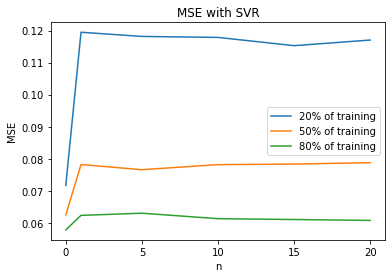

In [16]:
plt.plot(x_range, svr_scores_20, label='20% of training')
plt.plot(x_range, svr_scores_50, label='50% of training')
plt.plot(x_range, svr_scores_80, label='80% of training')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('MSE with SVR')
plt.legend()
plt.show()

## Save results

In [17]:
# Save MSE of all models
f_mse_energy_samples_NIaug_n = open('mse_energy_samples_NIaug_n.pickle', 'wb')
pickle.dump([sgdr_scores_20,sgdr_scores_50,sgdr_scores_80,dt_scores_20,dt_scores_50,dt_scores_80,svr_scores_20,svr_scores_50,svr_scores_80], f_mse_energy_samples_NIaug_n)
f_mse_energy_samples_NIaug_n.close()